### SEIS 763-01: Homework 9
#### Completed by: Jamie Boehme

Import libraries needed for analysis.

In [22]:
import pandas as pd
import numpy as np
import matplotlib as mp
import matplotlib.pyplot as plt 
from matplotlib.pyplot import figure
import seaborn as sns
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder as SklearnOneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
import statsmodels.api as sm
from sklearn.metrics import classification_report
from sklearn.model_selection import KFold
from sklearn import svm
from sklearn.metrics import roc_curve, roc_auc_score, precision_recall_curve, confusion_matrix, auc, accuracy_score
from sklearn import tree

Import cell cancer genome data from github repository.

In [66]:
train_x = pd.read_excel('/Users/jamieboehme/Desktop/SEIS 763-01/geneexpTrain.xlsx', index_col=None, header=None)
train_y = pd.read_excel('/Users/jamieboehme/Desktop/SEIS 763-01/tumortypeTrain.xlsx', index_col=None, header=None)
test_x = pd.read_excel('/Users/jamieboehme/Desktop/SEIS 763-01/geneexpTest.xlsx', index_col=None, header=None)
test_y = pd.read_excel('/Users/jamieboehme/Desktop/SEIS 763-01/tumortypeTest.xlsx', index_col=None, header=None, keep_default_na = False)
print(train_x.shape, train_y.shape, test_x.shape, test_y.shape)

(63, 2308) (63, 1) (25, 2308) (25, 1)


Do some exploratory analysis of the dataset including: reviewing number of columns and rows, data types, and overall shape of each column. Determine if there appear to be any obvious outliers. Check if there are any null values that will need to be taken care of prior to building a linear regression model.

In [11]:
train_x.dtypes, train_y.dtypes

(0       float64
 1       float64
 2       float64
 3       float64
 4       float64
          ...   
 2303    float64
 2304    float64
 2305    float64
 2306    float64
 2307    float64
 Length: 2308, dtype: object,
 0    object
 dtype: object)

In [12]:
train_x.describe()

,0,1,2,3,4,5,6,7,8,9,...,2298,2299,2300,2301,2302,2303,2304,2305,2306,2307
count,63.000000,63.000000,63.000000,63.000000,63.000000,63.000000,63.000000,63.000000,63.00000,63.000000,...,63.000000,63.000000,63.000000,63.000000,63.000000,63.000000,63.000000,63.000000,63.000000,63.000000
mean,1.499917,0.285963,0.973868,0.624049,0.301108,2.105405,5.077244,1.230895,1.29544,1.580010,...,0.772835,0.779162,0.324937,0.601719,0.903944,0.216938,0.241125,0.404775,0.692781,0.252010
std,0.894507,0.363846,0.647685,0.590634,0.170785,1.733135,2.296763,0.577145,0.61920,0.688737,...,0.430413,0.537537,0.241680,0.352051,0.669828,0.163477,0.193114,0.258727,0.349197,0.166489
min,0.068300,0.049400,0.157000,0.052000,0.040100,0.326900,2.172900,0.295800,0.52770,0.207600,...,0.102600,0.107900,0.058000,0.121600,0.052300,0.008200,0.004100,0.043000,0.067800,0.044600
25%,0.921900,0.088300,0.531350,0.119850,0.155650,1.091300,3.627900,0.725000,0.88420,1.053750,...,0.437450,0.445050,0.149950,0.359600,0.364850,0.090100,0.116650,0.249500,0.443950,0.136300
50%,1.276600,0.142300,0.892600,0.279600,0.297700,1.719900,4.527500,1.147200,1.14290,1.471900,...,0.747600,0.664900,0.249700,0.517400,0.736000,0.193700,0.181000,0.327600,0.651200,0.223000
75%,2.086300,0.267950,1.287950,1.265600,0.413800,2.570500,5.999400,1.549450,1.57720,2.000500,...,0.999600,0.973450,0.443250,0.700000,1.369000,0.301200,0.325000,0.420450,0.836950,0.298250
max,3.616500,1.924700,3.192300,1.792800,0.767400,11.620000,17.533000,2.602900,3.51070,3.072500,...,1.923500,3.601400,1.233900,1.800800,2.829700,0.812300,0.857900,1.562000,1.769100,1.042000


In [63]:
null_train_x = train_x.columns[train_x.isnull().any()]
train[null_train_x].isnull().sum()

Series([], dtype: float64)

In [62]:
null_train_y = train_y.columns[train_y.isnull().any()]
train[null_train_y].isnull().sum()

Series([], dtype: float64)

In [61]:
null_test_x = test_x.columns[test_x.isnull().any()]
train[null_test_x].isnull().sum()

Series([], dtype: float64)

In [60]:
test_y.columns[test_y.isnull().any()]
train[null_test_y].isnull().sum()

0    0
dtype: int64

1. Train a single decision tree to predict the breast cancer types in the testing set. 

In [68]:
clf = tree.DecisionTreeClassifier()
clf = clf.fit(train_x, train_y)

In [69]:
predict_y = clf.predict(test_x)
probs = clf.predict_proba(test_x)
probs.shape
test_y.to_numpy()

[[0. 0. 1. 0.]
 [0. 1. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [0. 1. 0. 0.]
 [1. 0. 0. 0.]
 [0. 0. 1. 0.]
 [0. 0. 0. 1.]
 [0. 1. 0. 0.]
 [0. 0. 1. 0.]
 [0. 1. 0. 0.]
 [0. 0. 0. 1.]
 [0. 0. 1. 0.]
 [1. 0. 0. 0.]
 [0. 0. 1. 0.]
 [0. 0. 0. 1.]
 [1. 0. 0. 0.]
 [0. 1. 0. 0.]
 [1. 0. 0. 0.]
 [0. 1. 0. 0.]
 [0. 0. 0. 1.]
 [1. 0. 0. 0.]
 [0. 0. 0. 1.]
 [0. 0. 1. 0.]]


(25, 4)

2. What is the precision / recall / F-measure for **EACH** class? 

In [72]:
acc_score = accuracy_score(test_y, predict_y)
print("\n", "Accuracy: " + str(acc_score))
print("\n", "CFM: \n", confusion_matrix(test_y, predict_y))
print("\n", "Classification report: \n", classification_report(test_y, predict_y))


 Accuracy: 0.64

 CFM: 
 [[3 0 0 0 0]
 [1 5 0 0 0]
 [2 0 0 1 2]
 [1 0 0 5 0]
 [1 1 0 0 3]]

 Classification report: 
               precision    recall  f1-score   support

          BL       0.38      1.00      0.55         3
          EW       0.83      0.83      0.83         6
          NA       0.00      0.00      0.00         5
          NB       0.83      0.83      0.83         6
          RM       0.60      0.60      0.60         5

    accuracy                           0.64        25
   macro avg       0.53      0.65      0.56        25
weighted avg       0.56      0.64      0.59        25



/usr/local/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


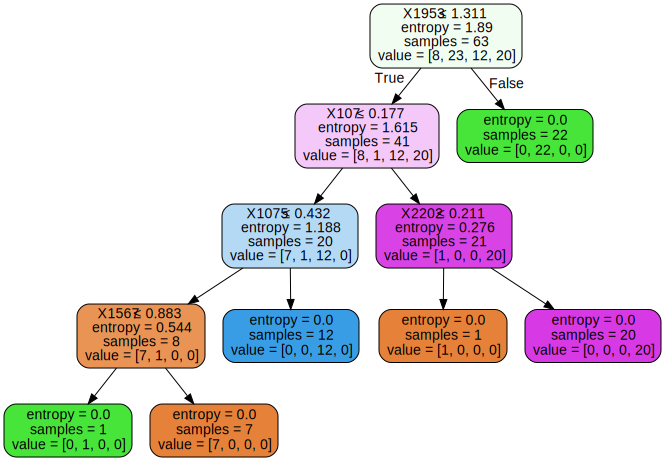

In [77]:
import graphviz 
'''
dot_data = tree.export_graphviz(clf, out_file=None) 
graph = graphviz.Source(dot_data) 
graph.render("Y Shape") 
'''
dot_data = tree.export_graphviz(clf, out_file=None, 
                     #feature_names=X.feature_names,  
                     #class_names=Y.target_names,  
                     filled=True, rounded=True,  
                     special_characters=True)  
graph = graphviz.Source(dot_data)  
graph 